## Colab 환경에서 하는 것을 권장합니다.

# 사전 준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 cd /content/drive/MyDrive/DSL22_2/정규세션/0830 TextMining_WordEmbedding/TextMining_WordEmbedding

/content/drive/MyDrive/DSL22_2/정규세션/0830 TextMining_WordEmbedding/TextMining_WordEmbedding


In [9]:
#konlpy 설치 (mecab 제외). 3~40초 정도 소요
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

In [10]:
# java 경로 설정
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [11]:
# 필요 라이브러리 불러오기
import os, json
from tqdm.notebook import tqdm

from konlpy.tag import Okt

from gensim.models import Word2Vec

import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [12]:
# data 불러오기
data_dir = os.path.join(os.getcwd(), 'data')

corpus = []
for i in tqdm(os.listdir(data_dir)):
    with open(os.path.join(data_dir, i), 'r') as f:
        json_data = json.load(f)
        print(json_data)
    corpus.append(json_data['sentences'])
corpus = sum(corpus, [])

  0%|          | 0/50 [00:00<?, ?it/s]

{'title': "'분자기계' 연구 3인 노벨화학상…장피에르 소바주 교수 등 공동 수상", 'slug': 'bunjagigye-yeongu-3in-nobelhwahagsang-jangpiereu-sobaju-gyosu-deung-gongdong-susang', 'source': 'http://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=228&oid=015&aid=0003664372', 'length': 13, 'sentences': ['분자를 부품처럼 활용한 세상서 가장 작은 기계', '메모리 소자 기술에 응용', '올해 노벨화학상은 일상 세계의 기계 장치를 분자 세계에서 구현해 세상에서 가장 작은 기계를 만든 과학자들에게 돌아갔다', '스웨덴 왕립과학원 노벨위원회는 5일 장피에르 소바주 프랑스 스트라부르대 교수(72)와 프레이저 스토더트 미국 노스웨스턴대 교수(74), 베르나르트 페링하 네덜란드 흐로닝언대 교수(65) 등 세 사람을 올해 노벨화학상 수상자로 선정했다고 발표했다', '위원회는 이들이 에너지를 운동으로 변환하는 기계장치를 분자 크기에서 구현해 화학과 기계 분야의 새 지평을 마련했다고 평가했다', '이들은 원자의 덩어리인 분자를 화학 반응이 아니라 기계처럼 사용하는 방법을 탐구했다', '여기에는 초(超)분자로 불리는 분자보다는 조금 크고 나노물질보다는 조금 작은 탄소 분자를 활용했다', '이들은 탄소원자를 기계적으로 이어붙여 고리를 만든 뒤 둘을 이어붙여 체인을 제작하거나 분자 막대 위에서 고리 하나가 왔다갔다하는 기계 장치로 구현했다', '프랑스 출신인 소바주 교수는 1983년 탄소원자로 만든 고리 두 개를 이어붙여 카테난이라는 초기 분자 기계를 개발했다', '영국 출신인 스토더트 교수는 1991년 분자 막대 하나와 분자 고리 하나를 연결시킨 로택산이란 분자 기계로 한 단계 발전시켰다', '네덜란드 출신인 페링하 교수는 1999년 세계에서 가장 작은 분자 모터를 개발하고 가장 작

데이터를 확인하고 어떻게 전처리를 하고 토큰화를 해야 할 지 고민해보세요!

In [13]:
corpus[0]

'분자를 부품처럼 활용한 세상서 가장 작은 기계'

In [14]:
corpus[:50]

['분자를 부품처럼 활용한 세상서 가장 작은 기계',
 '메모리 소자 기술에 응용',
 '올해 노벨화학상은 일상 세계의 기계 장치를 분자 세계에서 구현해 세상에서 가장 작은 기계를 만든 과학자들에게 돌아갔다',
 '스웨덴 왕립과학원 노벨위원회는 5일 장피에르 소바주 프랑스 스트라부르대 교수(72)와 프레이저 스토더트 미국 노스웨스턴대 교수(74), 베르나르트 페링하 네덜란드 흐로닝언대 교수(65) 등 세 사람을 올해 노벨화학상 수상자로 선정했다고 발표했다',
 '위원회는 이들이 에너지를 운동으로 변환하는 기계장치를 분자 크기에서 구현해 화학과 기계 분야의 새 지평을 마련했다고 평가했다',
 '이들은 원자의 덩어리인 분자를 화학 반응이 아니라 기계처럼 사용하는 방법을 탐구했다',
 '여기에는 초(超)분자로 불리는 분자보다는 조금 크고 나노물질보다는 조금 작은 탄소 분자를 활용했다',
 '이들은 탄소원자를 기계적으로 이어붙여 고리를 만든 뒤 둘을 이어붙여 체인을 제작하거나 분자 막대 위에서 고리 하나가 왔다갔다하는 기계 장치로 구현했다',
 '프랑스 출신인 소바주 교수는 1983년 탄소원자로 만든 고리 두 개를 이어붙여 카테난이라는 초기 분자 기계를 개발했다',
 '영국 출신인 스토더트 교수는 1991년 분자 막대 하나와 분자 고리 하나를 연결시킨 로택산이란 분자 기계로 한 단계 발전시켰다',
 '네덜란드 출신인 페링하 교수는 1999년 세계에서 가장 작은 분자 모터를 개발하고 가장 작은 나노 자동차를 제작했다',
 '김기문 포스텍 화학과 교수는 “카테난과 로택산은 스위치 기능을 할 수 있어 집적도의 한계에 이른 메모리 소자를 대체할 기술로 활용하거나 약물 전달 물질의 밸브로 이용하는 연구가 진행되고 있다”고 설명했다',
 '노벨화학상 수상자 세 사람은 800만스웨덴크로나(약 10억3900만원)의 상금을 똑같이 나눠 갖는다',
 '우리나라 기초연구의 문제가 국가혁신시스템에서 기초연구 전략이 부족하다는 지적이 나왔다',
 '과학기술정책연구원(STEPI)이 3일 한국

# 1번

자신만의 CustomTokenization을 만들어보세요! 세션에서 말씀 드렸듯이 정답이 있는 것이 아닙니다. 

제가 세션에서 설명했던 것 처럼 pos를 이용하여 품사를 구하고 품사를 통해 stop words를 지정해서 제거해 줄 수 있고, 따로 stopw words를 지정해서 의미 없다고 생각하는 단어들을 제거해도 상관 없습니다!

물론 Okt말고 다른 Tokenizer를 사용해도 괜찮습니다. 

다양한 방법으로 전처리를 진행해보고 왜 그런 전처리와 tokenizing 방법을 사용했는지 설명해주세요!

학습 목적이 정해지지 않아 간단하게 형태소 stem= ture, norm true로 진행해보았습니다.

In [15]:
okt = Okt()

In [16]:
corpus[1]

'메모리 소자 기술에 응용'

In [17]:
okt.normalize(corpus[10])

'네덜란드 출신인 페링하 교수는 1999년 세계에서 가장 작은 분자 모터를 개발하고 가장 작은 나노 자동차를 제작했다'

In [18]:
okt.morphs(corpus[1])

['메모리', '소자', '기술', '에', '응용']

In [19]:
# 자신만의 tokenization, preprocess 규칙을 만들고 그 규칙에 맞는 CustomTokenizer를 만들어보세요.
# 한 문장을 input으로 받아 token이 들어있는 list를 반환하는 함수를 구현해보세요.
def CustomTokenization(sentence):
    return okt.morphs(sentence, stem = True, norm = True)

In [20]:
# corpus_tokenized 안에 CustomTokenization의 return값이 들어 있는 2중 list를 만들어 보세요
corpus_tokenized = []
for i in tqdm(corpus):
    corpus_tokenized.append(CustomTokenization(i))

  0%|          | 0/1020 [00:00<?, ?it/s]

# 2번

이제 word2vec 모델을 학습시켜 봅시다!

1. 사전학습 없이 모델 학습
2. 사전학습 된 모델을 사용하여 학습

두가지를 진행해보세요

hyperparameter는 본인이 하고 싶으신 것으로 하면 됩니다. 단, 사전학습 된 모델을 사용할 때는 size = 200으로 맞추어 주세요!

hyperparameter 설정 기준을 설명해주세요!

데이터가 작기 때문에 min count =1 로 하였고, 복잡한 vector로 임베딩하는게 어렵기 때문에(데이터가 적어서) size를 줄였습니다.

In [21]:
# 사전학습 없이 모델 학습
# 모델 생성
model_no_pretrained = Word2Vec(size = 160 ,min_count = 1, window = 5)

# 모델 vocabulary 추가
model_no_pretrained.build_vocab(corpus_tokenized)

total_examples = model_no_pretrained.corpus_count
print('현재 vocabulary size(V) :',len(model_no_pretrained.wv.vocab))

현재 vocabulary size(V) : 4224


In [22]:
len(corpus)

1020

In [23]:
model_no_pretrained.corpus_count

1020

In [24]:
model_no_pretrained.corpus_total_words

24601

In [25]:
# 모델 학습
model_no_pretrained.train(corpus_tokenized, total_examples = total_examples, epochs = 100 )

(1938283, 2460100)

In [26]:
corpus[593]

'2단으로 구성돼 있고 지구를 탈출할 힘을 얻는 1단 추진체는 여러 대의 로켓을 하나로 묶는 ‘클러스터링’ 기법으로 만든다'

In [27]:
# 모델이 잘 학습 되었는지 자유롭게 확인해보세요!
# .wv.most_similar() 등 사용

model_no_pretrained.wv.most_similar('지구')

[('달이', 0.8561195731163025),
 ('드리우다', 0.8412613868713379),
 ('태양', 0.8387647867202759),
 ('대기', 0.8290379047393799),
 ('그림자', 0.8260433077812195),
 ('가까워지다', 0.8249986171722412),
 ('달', 0.8143649101257324),
 ('근지점', 0.8106605410575867),
 ('전부', 0.8048998117446899),
 ('망은', 0.8041285276412964)]

In [28]:
# 사전학습 된 모델을 사용하여 학습
#사전학습 된 모델 불러오기
pretrained = Word2Vec.load('ko.bin')

print('Pretrained model의 단어 수(V) :', len(pretrained.wv.vocab))
print('Pretrained model의 embedding vector의 size(N) :', len(pretrained.wv['강아지']))

# 모델 생성
model_pretrained = Word2Vec(size = pretrained.wv.vector_size, min_count = 1, window = 5 )

# 모델 vocabulary 추가
model_pretrained.build_vocab(corpus_tokenized)

total_examples = model_pretrained.corpus_count
print('현재 vocabulary size(V) :',len(model_pretrained.wv.vocab))

Pretrained model의 단어 수(V) : 30185
Pretrained model의 embedding vector의 size(N) : 200
현재 vocabulary size(V) : 4224


In [29]:
len(pretrained.wv.vocab.keys())

30185

In [30]:
#pretrained model의 학습되어 있는 vocabulary list 불러오기
model_pretrained.build_vocab([list(pretrained.wv.vocab.keys())], update = True)
print('현재 vocabulary size(V) :', len(model_pretrained.wv.vocab))

#embedding vector 까지 불러오기. lockf = 0.0 이면 불러온 벡터에 대해서는 재학습이 불가함. 1.0이면 재학습 가능.
model_pretrained.intersect_word2vec_format('ko.bin.gz', binary = False, lockf = 1.0)

현재 vocabulary size(V) : 31789


In [31]:
#embedding vector 까지 불러오기. lockf = 0.0 이면 불러온 벡터에 대해서는 재학습이 불가함. 1.0이면 재학습 가능.
model_pretrained.intersect_word2vec_format('ko.bin.gz', binary = False, lockf = 1.0)

In [32]:
# 모델 학습
model_pretrained.train(corpus_tokenized, total_examples = total_examples, epochs = 100)

(2395487, 2460100)

In [33]:
# 모델이 잘 학습 되었는지 자유롭게 확인해보세요!
# .wv.most_similar() 등 사용

model_pretrained.wv.most_similar('지구')

[('지구의', 0.65743088722229),
 ('태양', 0.5783538222312927),
 ('태양계', 0.5711793899536133),
 ('내행성', 0.5505870580673218),
 ('달의', 0.5454117059707642),
 ('천체', 0.5411285161972046),
 ('행성', 0.539038896560669),
 ('궤도', 0.5283633470535278),
 ('외행성', 0.5268636345863342),
 ('자기권', 0.5233033895492554)]

# 3번

사전 학습 없이 모델을 학습해도 성능이 괜찮나요?   
사전 학습 없이 학습한 모델과 사전 학습이 된 모델을 사용한 모델 간의 성능 차이가 있었나요? 차이가 있었다면 어떤 부분에서 차이가 나고 왜 그런 차이가 났는지 생각해보고 설명해주세요!

similar한 단어를 찾을때 애초에 vocab에 없어 성능이 좋지 않음
다량의 데이터 필요

# 4번

이제 학습된 모델을 통해 나온 embedding 결과를 2차원, 3차원에 embedding 시켜 봅시다.    
사전학습된 데이터를 사용하면 너무 단어 수가 많아지기 때문에 우리가 처음에 가지고 있던 corpus_tokenized 데이터만 사용하겠습니다.   
PCA, t-SNE를 사용해서 시각화하고 그 두가지 방법의 결과를 비교해보세요!   

추가적으로 무언가 재미있는 시각화 결과 (ex. 이거랑 저거랑 비슷한 위치에 임베딩 됐어요!) 가 있다면 추가적으로 남겨주세요!

[여러분의 설명]

In [34]:
# 시각화할 단어 리스트 생성
unique_text = list(set(sum(corpus_tokenized, [])))
len(unique_text)

4224

In [35]:
model_no_pretrained.wv['지구']

array([ 2.9435654 , -0.2591273 ,  1.3058065 ,  0.66089356,  1.3983092 ,
       -2.8231857 , -2.995069  , -1.4213386 , -1.640935  ,  1.2434003 ,
        0.4719588 ,  0.570391  ,  0.36640278, -1.8261595 ,  1.4935806 ,
       -2.0502286 ,  0.07123037, -1.3313078 , -0.8940056 , -0.5439    ,
        0.7493198 , -0.5951975 , -1.7167313 , -1.6468698 , -1.4059355 ,
        1.4711984 ,  2.1485863 , -0.58319896, -0.9907543 ,  1.8464066 ,
       -1.1642135 , -0.28914165, -0.6395451 , -1.1479352 ,  0.58780414,
       -2.218226  , -2.8582988 , -1.1906526 ,  2.6281245 ,  3.2612891 ,
       -1.1241312 , -1.8061097 ,  1.1168733 ,  0.46537045, -0.9377248 ,
       -2.2405584 , -0.24130642,  0.00957463, -0.40837634, -0.95463824,
       -1.4108552 , -0.867961  ,  1.7856203 , -0.2908073 ,  1.47007   ,
        1.9033605 ,  1.0575242 , -0.30279022, -0.4602286 ,  0.8460313 ,
        0.13564219,  1.7275114 , -0.7425783 ,  2.2597542 , -0.0461116 ,
       -1.0045066 , -0.9784631 , -3.0872307 ,  0.9880275 , -1.17

In [36]:
# embedding 결과 가져오기
word, vector = [], []
for i in unique_text:
    word.append(i)
    vector.append(model_no_pretrained.wv[i])

In [37]:
# embedding 결과 가져오기
word_pre, vector_pre = [], []
for i in unique_text:
    word_pre.append(i)
    vector_pre.append(model_pretrained.wv[i])

In [38]:
len(unique_text)

4224

In [39]:
import numpy as np 
a = np.array((vector))

In [40]:
len(vector)

4224

In [41]:
a.reshape(8448,-1).shape

(8448, 80)

In [42]:
len(vector)

4224

In [43]:
#그냥
pca = PCA(n_components = 3).fit_transform(vector)
tsne = TSNE(n_components = 3).fit_transform(vector)
#pretrained
pca_pre = PCA(n_components = 3).fit_transform(vector_pre)
tsne_pre = TSNE(n_components = 3).fit_transform(vector_pre)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [44]:
pca[0]

array([-0.31086606,  0.18151297,  0.05836363])

In [45]:
vector[:][0]

array([-5.99766430e-03, -5.35022691e-02,  8.53262842e-02,  3.47064878e-03,
        2.74868429e-01,  3.76018845e-02,  8.48780647e-02,  6.51942044e-02,
        1.21121928e-01,  9.63199977e-03,  8.93312544e-02,  6.94547296e-02,
        6.78904727e-02,  7.07281455e-02,  1.72408029e-01, -4.43703420e-02,
       -1.03683978e-01,  1.17331157e-02,  1.01334088e-01,  1.32520776e-02,
        9.17639807e-02,  1.55380545e-02, -2.76895370e-02, -2.06574976e-01,
       -2.07039550e-01,  1.55945987e-01,  6.83142319e-02, -1.41918600e-01,
        2.15606354e-02, -3.09634628e-03,  1.15304589e-01,  1.79237008e-01,
       -1.18285552e-01,  6.76000714e-02,  4.32430096e-02, -6.23926483e-02,
       -1.22062685e-02, -2.66372800e-01,  1.19873854e-04,  1.12040140e-01,
       -1.43954977e-01,  3.71642634e-02, -9.56183150e-02,  3.02536208e-02,
        7.57629350e-02, -4.51347940e-02,  8.19118917e-02,  3.77469137e-02,
       -1.09258778e-01, -1.96820684e-02, -2.71249376e-02,  1.01996139e-02,
        1.57251433e-01, -

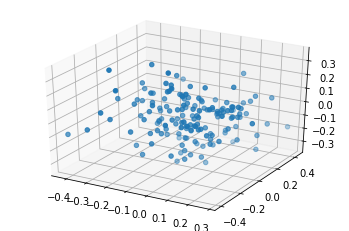

In [46]:
# 시각화해보세요!
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(vector[:][0],vector[:][1],vector[:][2])

In [47]:
import plotly
import plotly.graph_objs as go

In [48]:
len(vector)

4224

In [49]:
len(vector)

4224

In [50]:
tsne[0,:]

array([-22.70217   ,  -0.25280038,   4.8581095 ], dtype=float32)

In [51]:
tsne[:,0]

array([-22.70217 , -13.466915, -40.35328 , ...,  22.333498,  36.505642,
        31.642649], dtype=float32)

In [76]:
fig = plotly.subplots.make_subplots(
    rows = 2, cols =2
)

pca_data = go.Scatter3d(
    x=pca[:,0],
    y=pca[:,1],
    z=pca[:,2],

    mode='markers',
    marker=dict(
        size=3,

    )
)


tsne_data = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],

    mode='markers',
    marker=dict(
        size=3,

    )
)

pca_pre_data = go.Scatter3d(
    x=pca_pre[:,0],
    y=pca_pre[:,1],
    z=pca_pre[:,2],

    mode='markers',
    marker=dict(
        size=3,

    )
)


tsne_pre_data = go.Scatter3d(
    x=tsne_pre[:, 0],
    y=tsne_pre[:, 1],
    z=tsne_pre[:, 2],

    mode='markers',
    marker=dict(
        size=3,

    )
)
# fig.add_trace(go.Figure(data = [pca_data]), row =1, col =1)
# fig.add_trace(go.Figure(data = [tsne_data]), row =1, col =2)
# fig.add_trace(go.Figure(data = [pca_pre_data]), row =2, col =1)
# fig.add_trace(go.Figure(data = [tsne_pre_data]), row =2, col =2)


In [77]:
go.Figure(data =[pca_data])

In [78]:
go.Figure([tsne_data])

In [79]:
go.Figure(data = [pca_pre_data])

In [80]:
go.Figure(data = [tsne_pre_data])

# 5번

t-SNE에는 perplexity라는 hyperparameter가 존재했는데요. 5~50 사이의 값에서 robust 한 결과를 보인다고는 하지만 perplexity가 달라지면서 embedding 결과가 미묘하지만 크게 바뀌기도 합니다. perplexity와 n_iter 조합을 달리해보면서 perplexity의 변화가 embedding결과에 어떤 영향을 미치는지 살펴보세요!

In [81]:
# t-SNE
tsne3 =  TSNE(perplexity= 3).fit_transform(vector)
tsne10 = TSNE(perplexity= 10).fit_transform(vector)
tsne100 =  TSNE(perplexity= 100).fit_transform(vector)
# 시각화


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



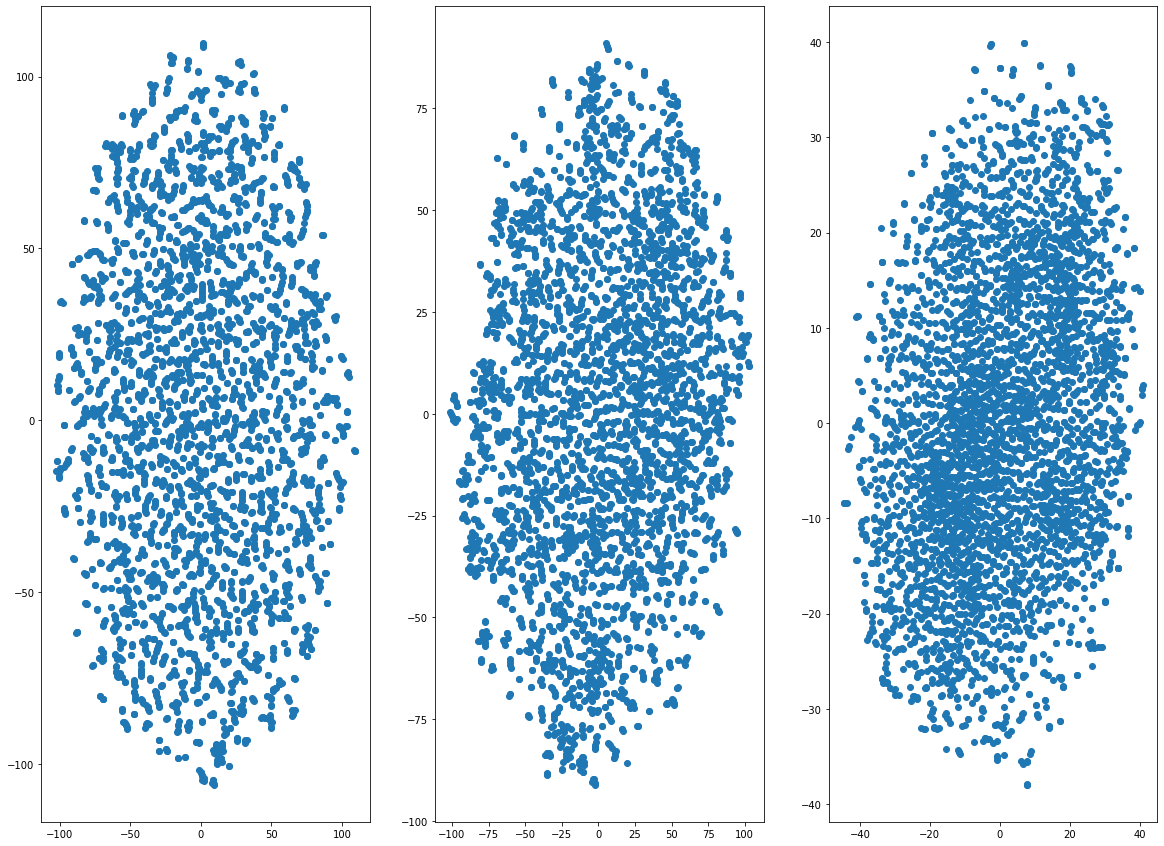

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (20,15))
ax[0].scatter(x = tsne3[:,0],y = tsne3[:,1],)
ax[1].scatter(x = tsne10[:,0],y = tsne10[:,1],)
ax[2].scatter(x = tsne100[:,0],y = tsne100[:,1],)



# 수고하셨습니다!